In [1]:
import discretisedfield as df
import oommfc as oc
import numpy as np
import math
from random import *

L = 1000e-9 
radius=450e-9
height= 100e-9
cellsize = 25e-9  # discretisation in all three dimensions.
A = 1e-12  # exchange energy constant (J/m)
K = 3.25e4  # Uniaxial anisotropy constant (J/m^3) 5.88e4
u = (0, 0, 1)  # Uniaxial anisotropy easy-axis
gamma = 2.211e5  #gyromagnetic ratio
alpha = 0.205  #Gilbert damping
# H=(8e6,0,0) #(A/m)

#mesh setup 
p1 = (-L/2, -L/2, -height/2)  # Minimum sample coordinate.
p2 = (L/2, L/2, height/2)  # Maximum sample coordinate.
cell = (cellsize, cellsize, cellsize/5)  # Discretisation.
mesh = oc.Mesh(p1=p1, p2=p2, cell=cell)  # Create a mesh object.

# Function for initialising magnetization
def m_init(pos):
    x, y, z = pos
    r = math.sqrt((x)**2 + (y)**2)
    x1=uniform(-1,1)
    x2=uniform(-1,1)
    x3=uniform(-1,1)
    maximum=max(abs(x1),abs(x2),abs(x3))
    if r <= 440e-9:
        return (0,0,1)
    if 440e-9 < r <= radius:
        return (x1/maximum, x2/maximum, x3/maximum)
    if r> radius:
        return (1,0,0)
    
#defining cylinder and saturation    
def Ms_function(pos):
    x, y, z = pos
    r = math.sqrt((x)**2 + (y)**2)
    if r <= radius and -height/2 <= z <= height/2:
        return 64e3 # (A/m) 
    else:
        return 0
    

In [2]:
system = oc.System(name="Nanodot")
system.hamiltonian = oc.Exchange(A) + oc.UniaxialAnisotropy(K, u) + oc.Demag() # oc.DMI(crystalclass="Cnv", D= -0.98e-3) + oc.Zeeman(H=H)
system.hamiltonian

Exchange(A=1e-12, name="exchange") + UniaxialAnisotropy(K1=32500.0, K2=0, u=(0, 0, 1), name="uniaxialanisotropy") + Demag(name="demag")

In [3]:
system.dynamics = oc.Precession(gamma) + oc.Damping(alpha)
system.dynamics

Precession(gamma=221100.0, name="precession") + Damping(alpha=0.205, name="damping")

In [4]:
system.m = df.Field(mesh, dim=3, value=m_init, norm=Ms_function)

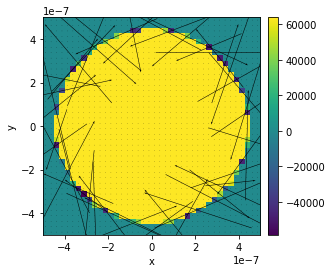

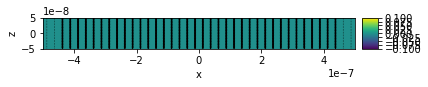

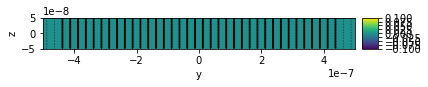

In [5]:
%matplotlib inline
system.m.plot_plane("z")
system.m.plot_plane("y")
system.m.plot_plane("x")

2018/09/13 14:27: Running OOMMF (Nanodot/Nanodot.mif) ... (8.7 s)


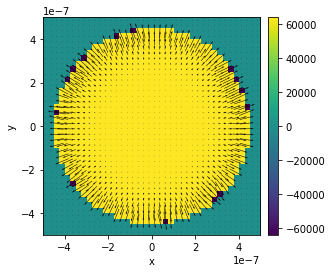

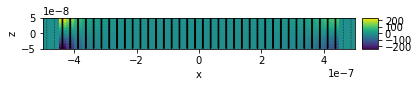

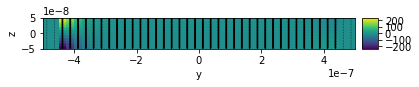

In [6]:
md = oc.MinDriver()
md.drive(system)
%matplotlib inline
system.m.plot_plane("z")
system.m.plot_plane("y")
system.m.plot_plane("x")